In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imagehash
from PIL import Image
from skimage import metrics

In [3]:
cover=cv2.imread('abc.jpg',0)
cover2=cv2.imread('abc.jpg',0)
stego=cv2.imread('circuits.png',0)

ENCODING

In [19]:
hash=imagehash.average_hash(Image.open('circuits.png'))
height,width=stego.shape

res=format(height,"010b")+format(width,"010b")# adding resolution in res
for i in range(height):# adding bin of pixel values in res
    for j in range(width):
        res=res+format(stego[i][j],"08b")

bin_hash=format(int(str(hash),16),"08b")
res+=bin_hash # adding bin_hash to res


In [5]:
length=len(res)
k=0
f=0
for i in range(cover.shape[0]):
    for j in range(cover.shape[1]):
        cover[i][j]=(cover[i][j] & 252) | int(res[k:k+2],2)
        k+=2
        if k==length:
            f=1
            break
    if f==1:
        break

DECODING

In [21]:
# calculating height,width from res obtained from stego image
res=''
for i in range(10):
    res=res+format(cover[0][i]&3,"02b")
i=0
height=int(res[i:i+10],2)
width=int(res[i+11:],2)


256 256


In [7]:
# recovering image pixels and hash from res obtained from stego image
res=''
length=height*width*4+10+32
k=0
f=0
# recovering image
for i in range(cover.shape[0]):
    for j in range(cover.shape[1]):
        res=res+format(cover[i][j]&3,"02b")
        k=k+1
        if k==length:
            f=1
            break
    if f==1:
        break

In [8]:
#reconstructing image 
recovered_img=np.zeros((height,width),'uint8')
k=20
for i in range(height):
    for j in range(width):
        recovered_img[i][j]=int(res[k:k+8],2)
        k=k+8

#recovering hash from res
bin_hash1 = res[k:k+64]

PLOTTING

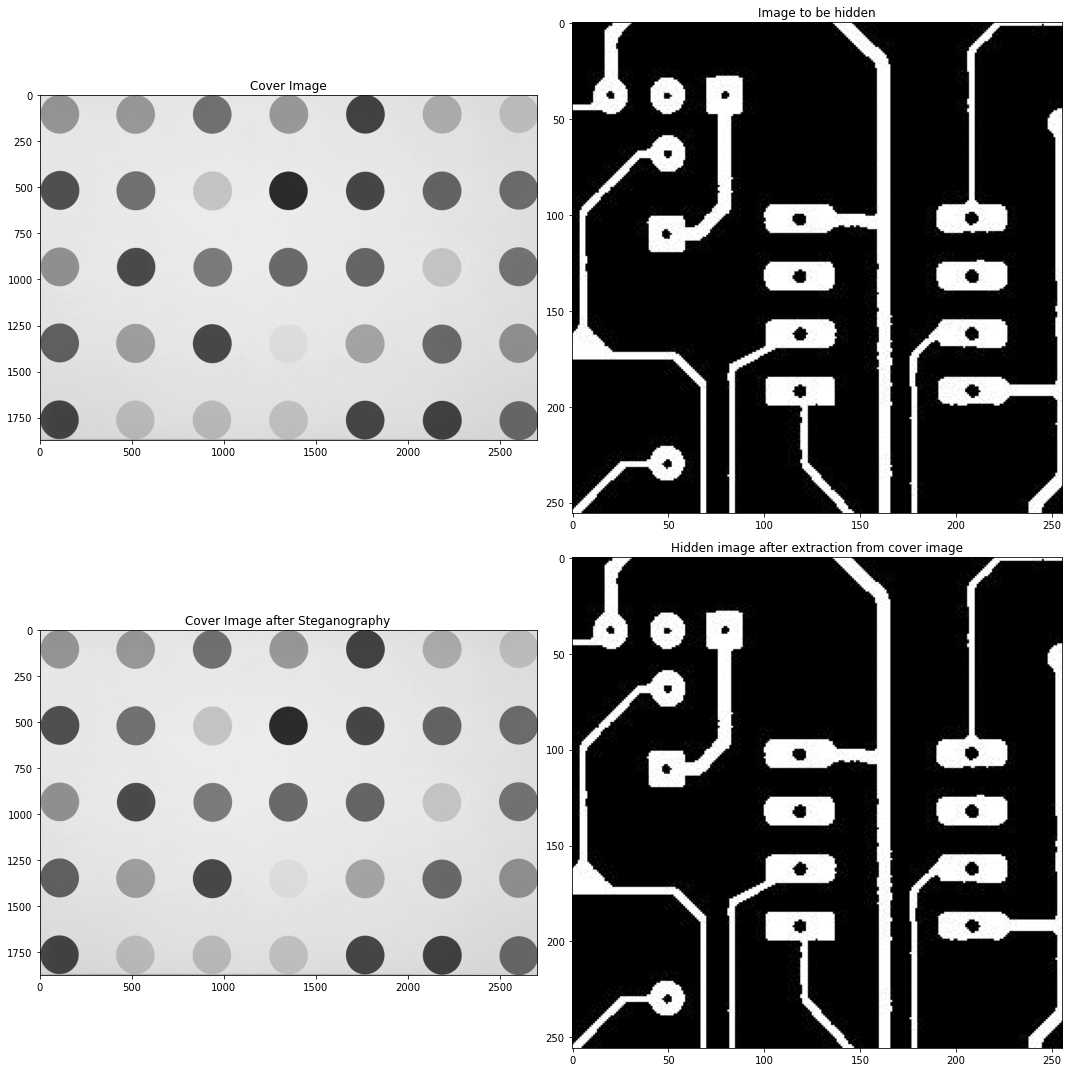

In [9]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.title('Cover Image')
plt.imshow(cover2,'gray')

plt.subplot(2,2,2)
plt.title('Image to be hidden')
plt.imshow(stego,'gray')

plt.subplot(2,2,3)
plt.title('Cover Image after Steganography')
plt.imshow(cover,'gray')

plt.subplot(2,2,4)
plt.title('Hidden image after extraction from cover image')
plt.imshow(recovered_img,'gray')

plt.tight_layout()

CHECKING HASH FOR IMAGE INTEGRITY

In [22]:
im=Image.fromarray(np.uint8(recovered_img)).convert(0)
print(type(im))
# plt.imshow(im,'gray')
bin_hash2=format(int(str(imagehash.average_hash(im)),16),"08b")
if(bin_hash1==bin_hash2):
    print("Hash matching")
else:
    print("Hash differnece is: ",bin_hash-bin_hash2)

<class 'PIL.Image.Image'>
Hash matching


In [12]:
# MSE
print("MSE: ",metrics.mean_squared_error(cover,cover2))
# PSNR
print("PSNR: ",metrics.peak_signal_noise_ratio(cover,cover2))
# SSIM
print("SSIM: ",metrics.structural_similarity(cover,cover2))

MSE:  0.18013202102849915
PSNR:  55.574894391651746
SSIM:  0.9983017954997858
